# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [2]:
# Params per documentation
# latitude = lat
# longitude = lon
# For temperature in Fahrenheit/mph use units=imperial
# City ID = id
# City name = name
# lat  = coord.lat
# humidity% = main.humidity
# cloudiness% = clouds.all
# windspeed% = wind.speed

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
# Build query URL(endpoint)
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# response = requests.get(query_url)

city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

count=0
missing=0

for city in cities:
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    response = requests.get(query_url).json()
    
#     print(response)
#     if (count>10): break

    try:
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])                
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        count+=1

        print(f"Processing record {count} of {len(cities)}: | {city}")
    except:
        print("City not found, skipping")
        
    time.sleep(2)

City not found, skipping
Processing record 1 of 651: | clyde river
Processing record 2 of 651: | urumqi
Processing record 3 of 651: | bredasdorp
Processing record 4 of 651: | puerto madryn
Processing record 5 of 651: | tasiilaq
Processing record 6 of 651: | souillac
Processing record 7 of 651: | moindou
Processing record 8 of 651: | korla
Processing record 9 of 651: | susanville
Processing record 10 of 651: | port alfred
Processing record 11 of 651: | pangnirtung
Processing record 12 of 651: | busselton
Processing record 13 of 651: | new norfolk
Processing record 14 of 651: | muisne
Processing record 15 of 651: | ushuaia
Processing record 16 of 651: | santa cruz del sur
Processing record 17 of 651: | maniitsoq
Processing record 18 of 651: | kieta
Processing record 19 of 651: | jinxiang
Processing record 20 of 651: | havoysund
Processing record 21 of 651: | wilmington
Processing record 22 of 651: | upernavik
Processing record 23 of 651: | sinnamary
Processing record 24 of 651: | nkhotak

Processing record 194 of 651: | iqaluit
Processing record 195 of 651: | barra patuca
Processing record 196 of 651: | ola
Processing record 197 of 651: | arica
Processing record 198 of 651: | lazaro cardenas
Processing record 199 of 651: | touros
Processing record 200 of 651: | katsuura
Processing record 201 of 651: | marienburg
Processing record 202 of 651: | alekseyevsk
Processing record 203 of 651: | luderitz
Processing record 204 of 651: | komsomolskiy
Processing record 205 of 651: | lahij
Processing record 206 of 651: | oktyabrskoye
Processing record 207 of 651: | avera
Processing record 208 of 651: | bonavista
Processing record 209 of 651: | bartica
Processing record 210 of 651: | kaitangata
Processing record 211 of 651: | malatya
Processing record 212 of 651: | china
Processing record 213 of 651: | pavilosta
Processing record 214 of 651: | freeport
Processing record 215 of 651: | fort nelson
City not found, skipping
Processing record 216 of 651: | vestmannaeyjar
Processing record

Processing record 384 of 651: | cuamba
Processing record 385 of 651: | kamyshin
Processing record 386 of 651: | kroonstad
Processing record 387 of 651: | nanortalik
Processing record 388 of 651: | poronaysk
City not found, skipping
Processing record 389 of 651: | noumea
Processing record 390 of 651: | nemuro
Processing record 391 of 651: | talnakh
City not found, skipping
Processing record 392 of 651: | kambove
Processing record 393 of 651: | ewa beach
Processing record 394 of 651: | casalmaggiore
Processing record 395 of 651: | baruun-urt
City not found, skipping
City not found, skipping
Processing record 396 of 651: | luangwa
Processing record 397 of 651: | bonoua
Processing record 398 of 651: | fairbanks
Processing record 399 of 651: | dunkirk
Processing record 400 of 651: | kavaratti
Processing record 401 of 651: | lagoa
Processing record 402 of 651: | abu samrah
Processing record 403 of 651: | goulburn
Processing record 404 of 651: | urdoma
Processing record 405 of 651: | merauke


Processing record 576 of 651: | opuwo
Processing record 577 of 651: | nadym
Processing record 578 of 651: | constantine
Processing record 579 of 651: | kirensk
Processing record 580 of 651: | ucluelet
Processing record 581 of 651: | escanaba
Processing record 582 of 651: | nanga eboko
Processing record 583 of 651: | almaty
Processing record 584 of 651: | palembang
Processing record 585 of 651: | olga
Processing record 586 of 651: | aguilas
Processing record 587 of 651: | kathmandu
Processing record 588 of 651: | itambacuri
Processing record 589 of 651: | virginia beach
Processing record 590 of 651: | borgo san dalmazzo
Processing record 591 of 651: | george
Processing record 592 of 651: | wad madani
Processing record 593 of 651: | healesville
Processing record 594 of 651: | ilhabela
Processing record 595 of 651: | perth
Processing record 596 of 651: | teya
City not found, skipping
Processing record 597 of 651: | pafos
Processing record 598 of 651: | singarayakonda
Processing record 599

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
#Dictionary to DataFrame
# #export data into a csv
weather_dict = {"City": city_name,
               "Lat": lat,
               "Lng": lng,
               "Max Temp": max_temp,
               "Humidity": humidity,
               "Cloudiness (%)": cloudiness,
               "Wind Speed (m/s)": wind_speed,
               "Country": country,
               "Date": date}

weather_df = pd.DataFrame(weather_dict)
weather_df
weather_df.to_csv('../Output_data/Output_weather_data.csv')

,City,Lat,Lng,Max Temp,Humidity,Cloudiness (%),Wind Speed (m/s),Country,Date
0,Clyde River,70.47,-68.59,44.60,87,40,8.05,CA,1596037471
1,Ürümqi,43.80,87.60,80.60,34,75,15.66,CN,1596037208
2,Bredasdorp,-34.53,20.04,66.20,55,0,13.87,ZA,1596037475
3,Puerto Madryn,-42.77,-65.04,47.77,52,0,11.83,AR,1596037477
4,Tasiilaq,65.61,-37.64,44.60,75,75,13.87,GL,1596037479
...,...,...,...,...,...,...,...,...,...
598,Barquisimeto,10.07,-69.32,68.00,100,15,10.29,VE,1596038673
599,Grand-Santi,4.25,-54.38,91.62,44,0,4.52,GF,1596038889
600,Dovers,12.88,-61.18,82.40,83,75,16.11,VC,1596038891
601,Strezhevoy,60.73,77.59,55.40,82,53,2.24,RU,1596038893


In [33]:
data_file = ('../Output_data/Output_weather_data.csv')
output_file = pd.read_csv(data_file)
output_file.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness (%),Wind Speed (m/s),Country,Date
0,0,Clyde River,70.47,-68.59,44.60,87,40,8.05,CA,1596037471
1,1,Ürümqi,43.80,87.60,80.60,34,75,15.66,CN,1596037208
2,2,Bredasdorp,-34.53,20.04,66.20,55,0,13.87,ZA,1596037475
3,3,Puerto Madryn,-42.77,-65.04,47.77,52,0,11.83,AR,1596037477
4,4,Tasiilaq,65.61,-37.64,44.60,75,75,13.87,GL,1596037479


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [25]:
weather_df['Humidity']>100

0      False
1      False
2      False
3      False
4      False
       ...  
598    False
599    False
600    False
601    False
602    False
Name: Humidity, Length: 603, dtype: bool

In [26]:
#ALL SKIPPED AS NO CITY WITH OUTLIER HUMIDITY OVER 100%

#  Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# Extract relevant fields from the data frame
# Export the City_Data into a csv

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

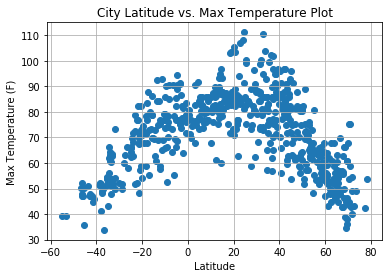

In [28]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o") 
plt.title("City Latitude vs. Max Temperature Plot")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

## Latitude vs. Humidity Plot

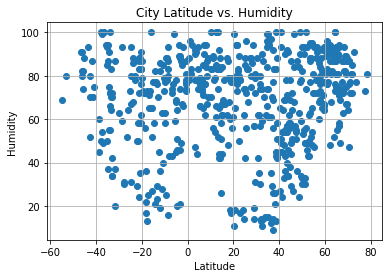

In [29]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o") 
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

## Latitude vs. Cloudiness Plot

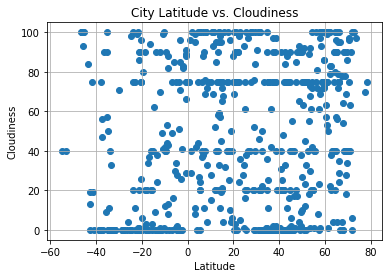

In [30]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness (%)"], marker="o") 
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

## Latitude vs. Wind Speed Plot

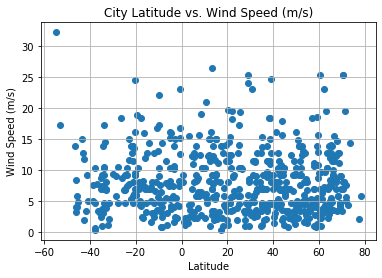

In [31]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed (m/s)"], marker="o") 
plt.title("City Latitude vs. Wind Speed (m/s)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

## Linear Regression

In [32]:
# OPTIONAL: Create a function to create Linear Regression plots

In [36]:
northern_weather = weather_df[weather_df["Lat"] > 0]
northern_weather

,City,Lat,Lng,Max Temp,Humidity,Cloudiness (%),Wind Speed (m/s),Country,Date
0,Clyde River,70.47,-68.59,44.60,87,40,8.05,CA,1596037471
1,Ürümqi,43.80,87.60,80.60,34,75,15.66,CN,1596037208
4,Tasiilaq,65.61,-37.64,44.60,75,75,13.87,GL,1596037479
7,Korla,41.76,86.15,82.00,64,48,4.00,CN,1596037486
8,Susanville,40.42,-120.65,70.00,45,1,1.41,US,1596037488
...,...,...,...,...,...,...,...,...,...
598,Barquisimeto,10.07,-69.32,68.00,100,15,10.29,VE,1596038673
599,Grand-Santi,4.25,-54.38,91.62,44,0,4.52,GF,1596038889
600,Dovers,12.88,-61.18,82.40,83,75,16.11,VC,1596038891
601,Strezhevoy,60.73,77.59,55.40,82,53,2.24,RU,1596038893


In [38]:
southern_weather = weather_df[weather_df['Lat'] < 0]
southern_weather

,City,Lat,Lng,Max Temp,Humidity,Cloudiness (%),Wind Speed (m/s),Country,Date
2,Bredasdorp,-34.53,20.04,66.20,55,0,13.87,ZA,1596037475
3,Puerto Madryn,-42.77,-65.04,47.77,52,0,11.83,AR,1596037477
5,Souillac,-20.52,57.52,71.60,83,75,9.17,MU,1596037481
6,Moindou,-21.69,165.68,77.00,50,100,13.87,NC,1596037484
9,Port Alfred,-33.59,26.89,60.57,70,0,14.52,ZA,1596037490
...,...,...,...,...,...,...,...,...,...
587,Itambacuri,-18.03,-41.69,83.52,36,3,4.94,BR,1596038861
590,George,-33.96,22.46,64.40,55,0,4.70,ZA,1596038867
592,Healesville,-37.65,145.52,48.99,99,47,0.36,AU,1596038872
593,Ilhabela,-23.78,-45.36,68.11,86,100,7.34,BR,1596038609


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4748144060496703


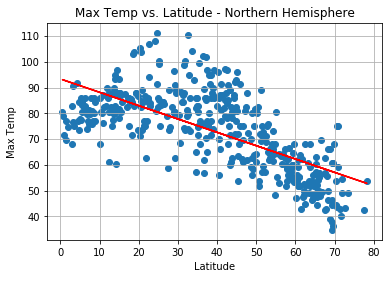

In [43]:
x_values = northern_weather["Lat"]
y_values = northern_weather["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=25,color="red")
plt.title("Max Temp vs. Latitude - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue**2}")
plt.grid(True)
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6199453059855331


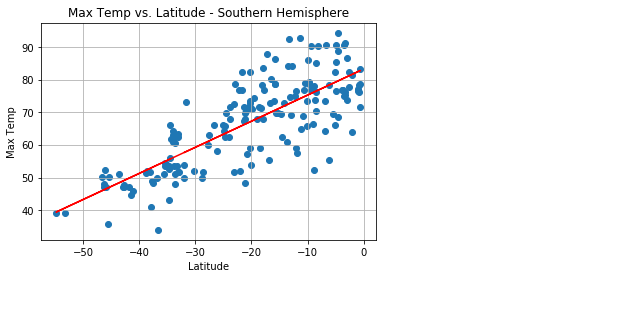

In [44]:
x_values = southern_weather["Lat"]
y_values = southern_weather["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=25,color="red")
plt.title("Max Temp vs. Latitude - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue**2}")
plt.grid(True)
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.005596826043693886


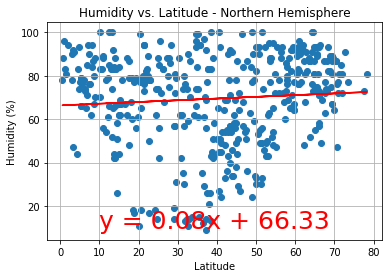

In [45]:
x_values = northern_weather["Lat"]
y_values = northern_weather["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=25,color="red")
plt.title("Humidity vs. Latitude - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.grid(True)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.010746212592547065


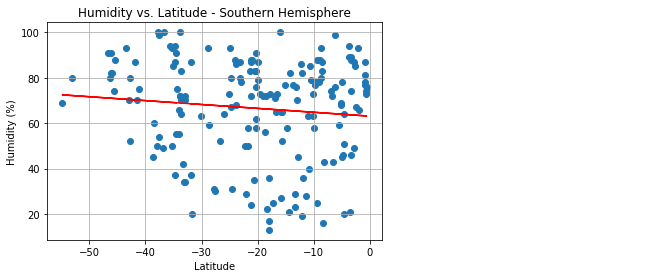

In [46]:
x_values = southern_weather["Lat"]
y_values = southern_weather["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=25,color="red")
plt.title("Humidity vs. Latitude - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.grid(True)
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0013458594205368482


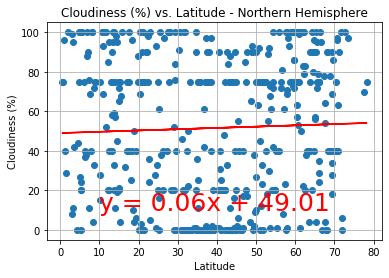

In [47]:
x_values = northern_weather["Lat"]
y_values = northern_weather["Cloudiness (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=25,color="red")
plt.title("Cloudiness (%) vs. Latitude - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.grid(True)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0017718411016589904


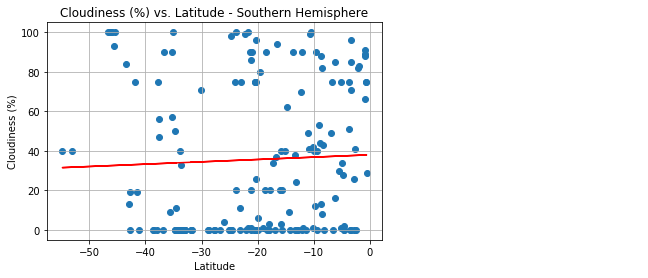

In [48]:
x_values = southern_weather["Lat"]
y_values = southern_weather["Cloudiness (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=25,color="red")
plt.title("Cloudiness (%) vs. Latitude - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.grid(True)
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 7.013726655343999e-05


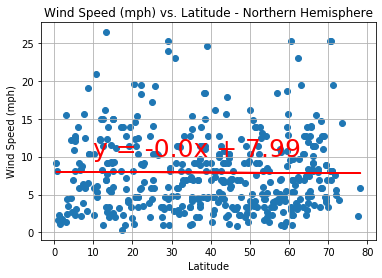

In [49]:
x_values = northern_weather["Lat"]
y_values = northern_weather["Wind Speed (m/s)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=25,color="red")
plt.title("Wind Speed (mph) vs. Latitude - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
plt.grid(True)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 1.0552640204935667e-05


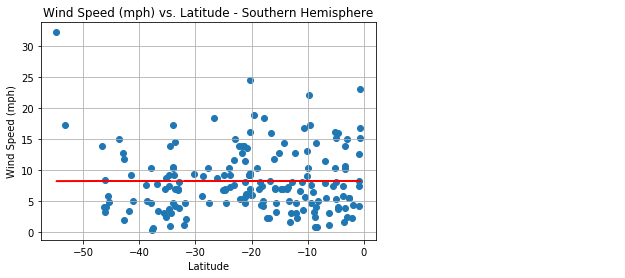

In [50]:
x_values = southern_weather["Lat"]
y_values = southern_weather["Wind Speed (m/s)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=25,color="red")
plt.title("Wind Speed (mph) vs. Latitude - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
plt.grid(True)
plt.show()